In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
seg = pd.read_csv('segment-1.csv')
seg['month'] = seg['Date'].apply(lambda x: x[0:2])
seg['cos-arpu'] = np.cos(seg['ARPU'])

In [7]:
X = seg[['ARPU', 'cos-arpu']]
y = seg['Segment 1 MRR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15081947)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

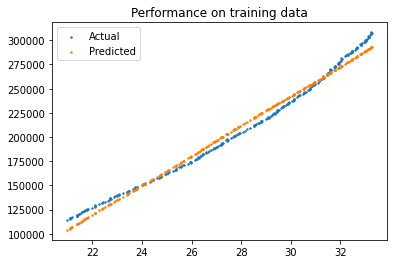

In [9]:
y_trn_pred = lr.predict(X_train)
plt.scatter(X_train['ARPU'], y_train, s = 2, label = 'Actual')
plt.scatter(X_train['ARPU'], y_trn_pred, s = 2, label = 'Predicted')
plt.legend()
ignore = plt.title('Performance on training data')

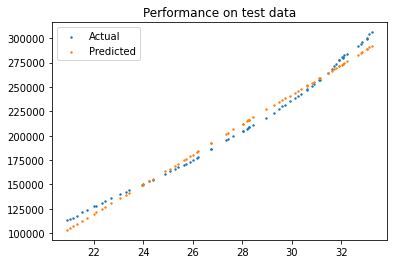

In [10]:
y_tst_pred = lr.predict(X_test)
plt.scatter(X_test['ARPU'], y_test, s = 2, label = 'Actual')
plt.scatter(X_test['ARPU'], y_tst_pred, s = 2, label = 'Predicted')
plt.legend()
ignore = plt.title('Performance on test data')

We will predict APRU for the next 3 months using $20\%$ increase. The first step is to find daily rate of increase that will give $20\%$ increase over three months.

In [11]:
r = np.power(1.2, 1/90) - 1

In [13]:
fut_arpu = [X['ARPU'][364] * np.power((1 + r), n) for n in range(91)]

In [16]:
X_fut = pd.DataFrame({'ARPU': fut_arpu, 'cos-arpu': np.cos(fut_arpu)})

These are the future values of segment 1's daily MRR for the next 90 days.

In [18]:
y_fut = lr.predict(X_fut)

The monthly values can be computed from them.

In [19]:
jan_arpu = np.sum(y_fut[0:30])
feb_arpu = np.sum(y_fut[31:59])
mar_arpu = np.sum(y_fut[60:90])

In [25]:
print('ARPU for Jan = {:0.2f}, Feb = {:0.2f}, Mar = {:0.2f}.'.format(jan_arpu, feb_arpu, mar_arpu))

ARPU for Jan = 9248824.94, Feb = 9539411.26, Mar = 11270077.95.
